# Friend or Foe: Determining Whether a Website is Malicious or Benign

When the internet was first created in the 1960s, it was made with one crucial assumption in mind: that anyone could be trusted.

At the time, this made perfect sense--its only use back then was to connect scientists from all around the globe so they could easily work with each other. Everyone was united in the same goal of research and development--there was no reason to harm anyone else, or break the thing that connected them all together. Even today, system priorities are often convenience first, security second.

Between the 1960s and now, though, things have changed. People from all walks of life now roam the internet, from celebrities to ordinary people. Net content has ballooned, from news to data sites to cat videos. And while the internet has ushered in a new age of convenience and connectivity, not all walks of life are good ones--and not all internet content is friendly.

In 2007, the Petya and WannaCry viruses struck, the first hobbling and nearly shutting down a whole company, the second locking banks and hospitals out of their own files until they paid a ransom.

In 2019, another cyberattack crippled Baltimore's 911 systems, forcing calls to be relayed manually, and costing responders precious time.

Click on the wrong link, or download the wrong file, and if your data isn't stolen or held for ransom, your computer could be enslaved to a botnet or damaged beyond repair. Even visiting a malicious site could result in malware infecting your system, without any other input from you.

While it's impossible to defend against every attack, especially as the internet grows and changes, it's still possible to mitigate the risk of malware infection. A good way to defend against malicious websites, for example, is building an internet blacklist--a type of filter that blocks malicious websites from reaching the user. The only problem with this approach is that the internet is a massive place, and it would take forever to examine each and every website to see if it's dangerous.

This is where data science comes in. While the term "data science" has multiple definitions, at its core, it applies computational and statistical techniques to either address or gain insight into a real-world problem. With the ability to process large amounts of data in seconds, and the help of a large-enough dataset, data science can predict life expectancies, analyze text, or even identify buildings at risk of catching fire.

For this tutorial, we'll learn how to create a binary classifier: a tool that can determine whether an object is one type of thing, or another. Our goal is to not only get familiar with the data science pipeline, but gain a better understanding of what makes, or doesn't make, a website malicious.

## Getting Started

Before you begin, be sure to import the files below into your Python workspace. Each one contains special tools and functions that will help us visualize and manipulate the data.

(Add documentation for each section?)

In [1]:
# Used for creating and manipulating DataFrames and Series.
# The contents of this dataset are the ones used the most often.
import pandas as pd

# Importing "re" library in order to use regexes.
import re

# Used to shuffle the data for both fitting
# and validation.
from sklearn.utils import shuffle

# Used for fitting our first classification model.
# (Chosen due to its ability to calculate p-values.)
import statsmodels.api as sm

# Used to display and visualize our data.
import matplotlib.pyplot as plt

# Will be used during the mdoeling section to
# create a sigmoid function.
import math

# Used for cross-validation during the validation stage.
from sklearn.linear_model import LogisticRegressionCV

## Assembling the Data

We can't create something out of nothing, so in order to create our binary classifier, we'll need to gather data first. For this, we'll use a [dataset full of malicious and benign website data](https://www.kaggle.com/xwolf12/malicious-and-benign-websites), which can be found on Kaggle.com.

We'll first download the dataset from Kaggle as a zip file, before unzipping it in the location where we'll run our data science code. After it's fully unzipped, we can use the read_csv() command from Pandas to read the data into our program, since the dataset creator stored it as a CSV (Comma-Separated Value) file. read_csv() will store the file's contents into what's known as a DataFrame--a Pandas structure that works much like a table.

Each row of the DataFrame contains an observation--all the measurements associated with a single object, in this case, a website. Each column of the DataFrame contains a variable--a measurement or attribute--associated with an object

Each column of a DataFrame contains a variable--a measurement or attribute--for an object, like how long a website's URL is or what type of server it uses. Each row of the DataFrame contains an observation--all the measurements associated with a single object.

In this case, each row would contain data for a specific website, while each column would contain varia

In [2]:
# Downloading the CSV file into a DataFrame.
full_data = pd.read_csv("malicious-and-benign-websites/dataset.csv")

# NOTE: Any date-related stuff needs to potentially be converted:
#print(type(full_data.loc[3, "WHOIS_UPDATED_DATE"]))

# Displays the first 10 rows/observations present in the DataFrame.
full_data.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/07/2016 0:00,...,0,3,1189,14,13,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,...,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,None,...,0,0,0,2,1,62,146,2,2.0,1


## Data Processing

We may have our full data set now, though, but it's not time to celebrate yet. Much like iron ore or a diamond in the rough, the data needs to be polished and refined before it can be put to use for anything. Even datasets from reliable sources can have data that's messy or outright missing.

The first thing we should do is take a look at what each column of data identifies. Note that in any data table, each column represents a variable--a measure or object related to what we're observing. If we were conducting a health study, for example, we would use height, weight, and age as some of our variables.

Here are the variables present in this data table:

In [3]:
# Storing the variable names in a variable of their own:
var_names = full_data.columns

# Printing out the variable names for each data table:
for i, v in enumerate(var_names):
    # The number in a list where the variable would be.
    # (Note that list indices normally start at 0, hence the "+ 1".
    num = i + 1
    print(num,". ", v)

1 .  URL
2 .  URL_LENGTH
3 .  NUMBER_SPECIAL_CHARACTERS
4 .  CHARSET
5 .  SERVER
6 .  CONTENT_LENGTH
7 .  WHOIS_COUNTRY
8 .  WHOIS_STATEPRO
9 .  WHOIS_REGDATE
10 .  WHOIS_UPDATED_DATE
11 .  TCP_CONVERSATION_EXCHANGE
12 .  DIST_REMOTE_TCP_PORT
13 .  REMOTE_IPS
14 .  APP_BYTES
15 .  SOURCE_APP_PACKETS
16 .  REMOTE_APP_PACKETS
17 .  SOURCE_APP_BYTES
18 .  REMOTE_APP_BYTES
19 .  APP_PACKETS
20 .  DNS_QUERY_TIMES
21 .  Type


While the Kaggle page mentions *most* of the variables present in the table, it's explanations could be confusing--and it neglected to mention two of the variables mentioned in the table. Thus, we'll provide you a quick explanation of what the datasets appear to contain.

Note that to collect the data, the researcher used what's called a [honeypot server](https://searchsecurity.techtarget.com/definition/honey-pot), a special computer that emulates a real computer. The objective of a honeypot is to encourage hackers to break in by pretending to be a normal system. In actuality, the honeypot is isolated from the other networks associated with the person or business using them, heavily monitored to watch how the intruder breaks into, and moves around, the system. 

1. URL -- the anonymous identification used to identify the URLs of the websites used in the study.


2. URL_LENGTH -- the number of characters in the aforementioned URL.


3. NUMBER_SPECIAL_CHARACTERS -- the number of special characters identified in the URL, like "/", "%", or "&".


4. CHARSET -- a categorical (aka qualitative, or non-numeric) variable that identifies the [character set](https://www.w3.org/International/questions/qa-what-is-encoding#what) used to represent the characters used on the webpage.


5. SERVER -- a categorical variable that identifies the [server](https://www.lifewire.com/servers-in-computer-networking-817380) that stores the website.


6. CONTENT_LENGTH -- the content size of the [HTTP header](https://www.techopedia.com/definition/27178/http-header).


7. WHOIS_COUNTRY -- the country associated with the website's server.


8. WHOIS_STATEPRO -- the state or province associated with the website's server.


9. WHOIS_REGDATE -- the registration data associated with the web server.


10. WHOIS_UPDATED_DATE -- the last time the web server was updated.


11. TCP_CONVERSATION_EXCHANGE -- the number of [TCP packets](https://www.lifewire.com/tcp-headers-and-udp-headers-explained-817970) exchanged between the server and the Kaggle dataset's honeypot client.


12. DIST_REMOTE_TCP_PORT -- the number of [ports](https://www.techopedia.com/definition/3659/computer-port) detected that are different from the [TCP port](https://www.bleepingcomputer.com/tutorials/tcp-and-udp-ports-explained/).


13. REMOTE_IPS -- the total number of [IPs](https://www.computerhope.com/jargon/i/ip.htm) currently connected to the honeypot.


14. APP_BYTES -- the number of bytes transferred between the website and honeypot servers.


15. SOURCE_APP_PACKETS -- the number of packets sent from the honeypot to the server.


16. REMOTE_APP_PACKETS -- the number of packets recieved by the honeypot, from the server.


17. SOURCE_APP_BYTES -- the number of bytes sent from the honeypot to the server. (WARNING: definition not mentioned on Kaggle page, this is an educated guess.)


18. REMOTE_APP_BYTES -- the number of bytes recieved by the honeypot, from the server. (WARNING: defintion not mentioned on Kaggle page, this is an educated guess.)


19. APP_PACKETS -- the total number of [IP packets](https://www.lifewire.com/structure-of-ip-packet-3426715) generated during the communication between the honeypot and the server.


20. DNS_QUERY_TIMES -- the number of [DNS packets](http://social.dnsmadeeasy.com/blog/the-mechanics-behind-the-internet-what-is-a-dns-query/) generated when the honeypot and remote server communicate. (NOTE: this querying is likely done by the honeypot, measuring how long it takes to get a response.)


21. Type -- the value specifying whether the website is malicious or benign. If the website is malicious, the value is 1, while if it is benign, the value is 0. (NOTE: this is the variable we want to determine when using our binary classifier.)

Since the URL column contains anonymous identifiers, and no other information, we'll delete the column from the table. We're looking for either measurements, or data we can measure, the IDs can't give us.

### Eliminating Bad Variables

In [4]:
# Deleting due to irrelevant content.
# While the actual URL could be studied for information,
# anonymous IDs don't tell us anything.
del full_data["URL"]

We'll also delete the WHOIS_UPDATED_DATE column, since it could be a very fickle--and unreliable--value to use. The dataset we're examining is almost a year old, and with the internet constantly growing and changing, it's highly likely that many of the websites in our set have re-updated.

Functionally, this column is useless.

In [5]:
# Deleting due to fickle data. It's highly likely that the dates
# listed have already changed for the website.
del full_data["WHOIS_UPDATED_DATE"]

The REMOTE_IPS column can also go, owing to the type of data it represents. IP addresses are meant to act as the address of a particular website, just like a street address can mark a house. While there are scenarios where a certain website has multiple IP addresses, high numbers in the REMOTE_IPS column could just as easily be caused by multiple websites acccessing the honeypot at once.

Since the number of IPs connected to the honeypot tells us nothing about the website itself, we can easily scrap this column.

In [6]:
# Deleting due to irrelevant content.
# A more useful data value would be the IP address of the website.
del full_data["REMOTE_IPS"]

In [7]:
full_data.head(10)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,7,0,700,9,10,1153,832,9,2.0,1
1,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,17,7,1230,17,19,1265,1230,17,0.0,0
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,0,0,0,0,0,0,0,0,0.0,0
3,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,31,22,3812,39,37,18784,4380,39,8.0,0
4,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,57,2,4278,61,62,129889,4586,61,4.0,0
5,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,11,6,894,11,13,838,894,11,0.0,0
6,18,6,iso-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,12,0,1189,14,13,8559,1327,14,2.0,0
7,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,0,0,0,0,0,0,0,0,0.0,0
8,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,0,0,0,2,3,213,146,2,2.0,1
9,20,5,utf-8,nginx/1.10.1,NaN,None,None,8/11/2014 7:41,0,0,0,2,1,62,146,2,2.0,1


As for the SOURCE_APP_BYTES and REMOTE_APP_BYTES columns, we'll keep them despite not knowing their exact definitions. If we manage to find some connection between them and whether a website is malicious or not, we could potentially study the number of bytes sent to and from a honeypot server and remote website in a future data-gathering session.

### Cleaning the DataFrame

Now that we've gotten the more irrelevant columns out of the way, we can start tidying up the data to make it easier to use. Tidy data refers to datasets where:

* Each variable in the dataset forms a column and contains values.

    
* Each observation forms a row


* Each observational unit has a table
    
Messy datasets, which haven't been tidied up, tend to have unusual formats that make it difficult to retrieve and manipulate their data. You can generally tell if a dataset is messy when it has one of the following characteristics:

* The column headers are values, not variable names. For example, instead of having a column that tracks the length of a URL, the column instead tracks how many websites have a URL length of 6.


* Multiple variables are stored in the same column. For example, a WEBSITE_DATA column that stores both the IP address of a website, AND its URL.


* Variables stored in both rows AND columns.


* Multiple types of observational units are stored in the same table. Our data table already lists the characteristics of various websites, but does it *really* need to know the website programmer's height and weight?


* A single observational unit stored in multiple tables.
   
Our job is to comb through the dataset to make sure it doesn't have any characteristics of a messy dataset, and to correct any of those characteristics we find. This can mean anything from "melting" a dataset--putting each individual URL length into its own column--to outright removing data, like deleting the offending programmer height and weight columns.

(To learn more about tidying data, feel free to click [here](http://www.jeannicholashould.com/tidy-data-in-python.html).)

---

For the most part, the data table is very clean. None of the column headers are values, there aren't any out-of-place observational units, and with only one table to worry about, we don't need to deal with any duplicate observations.

Looking at WHOIS_STATEPRO, however, something seems a little... off.

Theoretically, it only stores one data point: the state or province associated with a server. The problem is, how many European countries have a Texas province, and how many states do you know by the name of Ontario? WHOIS_STATEPRO indirectly tells you not only the state or province where a server is located, but what country the server hails from, too. It effectively stores two variables in the same column, by the nature of state and province names.

On top of that, STATEPRO's syntax could potentially be confusing. If a bunch of countries have no states or provinces associated with them, and the spots are then marked with "None", our program could pick up trends in the data that aren't there, throwing off our measurements.

For the sake of a tidier dataset, and to prevent it from getting overly specific, we'll delete the WHOIS_STATEPRO column instead of merging it with the WHOIS_COUNTRY column.

In [8]:
# NOTE: may either want to pop this, or better yet come back later in the
# drafting process and work on it then.
del full_data["WHOIS_STATEPRO"]

In [9]:
full_data.head(10)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_REGDATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,iso-8859-1,nginx,263.0,None,10/10/2015 18:21,7,0,700,9,10,1153,832,9,2.0,1
1,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,17,7,1230,17,19,1265,1230,17,0.0,0
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,0,0,0,0,0,0,0,0,0.0,0
3,17,6,ISO-8859-1,nginx,162.0,US,7/10/1997 4:00,31,22,3812,39,37,18784,4380,39,8.0,0
4,17,6,UTF-8,None,124140.0,US,12/05/1996 0:00,57,2,4278,61,62,129889,4586,61,4.0,0
5,18,7,UTF-8,nginx,NaN,SC,3/08/2016 14:30,11,6,894,11,13,838,894,11,0.0,0
6,18,6,iso-8859-1,Apache/2,345.0,US,29/07/2002 0:00,12,0,1189,14,13,8559,1327,14,2.0,0
7,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,18/03/1997 0:00,0,0,0,0,0,0,0,0,0.0,0
8,20,5,utf-8,nginx/1.10.1,NaN,None,8/11/2014 7:41,0,0,0,2,3,213,146,2,2.0,1
9,20,5,utf-8,nginx/1.10.1,NaN,None,8/11/2014 7:41,0,0,0,2,1,62,146,2,2.0,1


Looking further at our dataset, the data inside APP_PACKETS seem a little suspicious when compared to SOURCE_APP_PACKETS. It's almost like they share the same--wait a minute...

In [10]:
# A series that tests for differences between the aforementioned series.
test_diffs = full_data["SOURCE_APP_PACKETS"] == full_data["APP_PACKETS"]

# An extra value to help test if the columns share 
# the exact same data.
fully_equiv = True

# This loop iterates through test_diffs to see
# if any differences between the two lists were found.
for i, d in enumerate(test_diffs):
    
    # If a difference is found...
    if d == False:
        # Its location in the series is printed off.
        print("There is a false value in spot", i)
        
        # fully_equiv is set to false, since we know we've
        # found a difference.
        fully_equiv = False
        
        # We also exit the loop since we found something.
        break
        
# fully_equiv is printed off.
print("The value of fully_equiv is", fully_equiv,".")

The value of fully_equiv is True .


They both contain the same values! When the dataset creator talked about generated packets, he must have been referring to the packets generated by his honeypot server.

The APP_PACKETS column is functionally redundant, and can therefore be deleted.

In [11]:
del full_data["APP_PACKETS"]

full_data.head(10)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_REGDATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,Type
0,16,7,iso-8859-1,nginx,263.0,None,10/10/2015 18:21,7,0,700,9,10,1153,832,2.0,1
1,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,17,7,1230,17,19,1265,1230,0.0,0
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,0,0,0,0,0,0,0,0.0,0
3,17,6,ISO-8859-1,nginx,162.0,US,7/10/1997 4:00,31,22,3812,39,37,18784,4380,8.0,0
4,17,6,UTF-8,None,124140.0,US,12/05/1996 0:00,57,2,4278,61,62,129889,4586,4.0,0
5,18,7,UTF-8,nginx,NaN,SC,3/08/2016 14:30,11,6,894,11,13,838,894,0.0,0
6,18,6,iso-8859-1,Apache/2,345.0,US,29/07/2002 0:00,12,0,1189,14,13,8559,1327,2.0,0
7,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,18/03/1997 0:00,0,0,0,0,0,0,0,0.0,0
8,20,5,utf-8,nginx/1.10.1,NaN,None,8/11/2014 7:41,0,0,0,2,3,213,146,2.0,1
9,20,5,utf-8,nginx/1.10.1,NaN,None,8/11/2014 7:41,0,0,0,2,1,62,146,2.0,1


There doesn't seem to be a similar connection between the APP_BYTES and SOURCE_APP_BYTES columns, but with no definite definition of what SOURCE_APP_BYTES measures, it would be difficult to tell for sure.

As for the three variables measuring byte counts, we'll keep them all for now. While SOURCE_ and REMOTE_APP_BYTES don't have a definition, they could still give us clues we could use in future research.

### Eliminating NaN Values

Next order of business is dealing with all values in the DataFrame that are marked as NaN.

A NaN value acts as a special marker in your data, telling you that the value for that particular point is missing. Maybe you accidentally deleted the data while you were gathering it for research. Maybe shadow ninjas somehow hid some values from your view. For whatever reason, you just weren't able to gather data for a specific variable or website.

In order to deal with NaN values, we first need to know how many there are. If only a few values are missing, we can easily use a process called interpolation to help fill in the gaps. If a larger group of values is missing, then extra work may need to be done to fill in the gaps. Ignoring the NaN values could skew our data when we try to construct are classifier, or simply make it difficult to apply functions expecting data points to be there.

Fortunately, Pandas provides an easy way for us to figure out how many NaNs there are:

In [12]:
# A list of the number of NaNs in each column.
# isna() checks if a value is NaN or not,
# while sum() tallies them up.
nan_sums = full_data.isna().sum()

print(nan_sums)

#full_data

URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_REGDATE                  0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


The good news is the SERVER and DNS_QUERY_TIMES columns look pretty complete. The data for the latter can easily be filled using the interpolate() function, while the data for the former can be filled out later.

The bad news is... youch. Even for a *normal* column with missing data, that's a lot of NaN values.

Let's check the DataFrame to see how many rows/observations our DataFrame normally has:

In [13]:
# Using pattern-matching to extract
# each value of full_data.shape.
(full_rows, full_columns) = full_data.shape

print("Number of rows:", full_rows)

Number of rows: 1781


1781 rows, huh? This means that CONTENT_LENGTH is missing roughly half of its values!

Normal NaN-replacement techniques won't work if the column is half-empty, and with no other datasets to help us supplement this column, we should delete it to avoid any data-skewing.

In [14]:
# NOTE: the 1 NaN value in the server section
# pretty much confirms that "None" is NOT
# this data collector's way of saying "NaN"
# for qualitative objects.

# Good news is, as long as I can figure out a way
# to deal with CONTENT_LENGTH, I *should* be free
# to use interpolation. (Glad the other stuff is pretty complete.)

# ...Might be wise to delete the CONTENT_LENGTH column.

# Deleting this since it's filled with almost 50% NaN values.
del full_data["CONTENT_LENGTH"]

With that out of the way, it *should* be safe to use interpolation to fill the remaining NaN gaps. Before that happens, though, we should comb through any columns containing quantiative (numerical) variables, to make sure they're not using any unusual substitutes for NaN, like a string or boolean value.

By removing any of these possible string instances, we'll make it easier for us to use interpolation--one of [a set of different methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html) that can be used to deal with NaN values.

In [15]:
# The updated columns for the DataFrame:
var_names = list(full_data.columns)

# The observations of the full dataset...
fd_obs = list(full_data.index)

# A variable that holds the names of the columns holding quantitative (numeric) values.
quant_names = list(full_data.columns)

# The names of the columns containing qualitative (non-numeric) values
# are removed from the dataset.
quant_names.remove("CHARSET")
quant_names.remove("SERVER")
quant_names.remove("WHOIS_COUNTRY")
quant_names.remove("WHOIS_REGDATE")

# A function meant to convert the object to NaN
# if it's a string. Meant for use on quantity datasets.
def str_to_nan(x):
    
    # Storing in a separate value,
    # just in case.
    x_type = type(x)
    
    if x_type == str or x_type == bool:
        print("String detected!")
        x = pd.np.nan
        
    return x
        
# Iterate through each quantity 
# (Need to edit this...)
for n in quant_names:
    full_data[n] = list(map(str_to_nan, full_data[n]))

After the quantitative columns have been swept for unusual NaN substitutes, it's safe to use the Pandas [interpolate()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html#pandas.DataFrame.interpolate) function to smooth over any holes in the dataset.

Interpolation effectively takes two datapoints, and constructs a new one in between them. This means that for any missing values in our data columns, interpolate() will take a look at the column value that comes before the NaN, and the value that comes after it, before calculating a new value based on those points. It's effectively like building a bridge.

Unfortunately, it's no good for large swathes of NaNs, especially if the NaNs are directly above or below each other. While the interpolate() function can easily deal with groups of NaNs clumped together, using it in CONTENT_LENGTH would have resulted in clumps of identical values, and skewed data as a result. Talk about a bridge too far!

In [16]:
# interpolation() is best used for plugging small data gaps.
# Try not to use it on sets where large data chunks
# are missing!
full_data = full_data.interpolate()

full_data.head(10)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_REGDATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,Type
0,16,7,iso-8859-1,nginx,None,10/10/2015 18:21,7,0,700,9,10,1153,832,2.0,1
1,16,6,UTF-8,Apache/2.4.10,None,None,17,7,1230,17,19,1265,1230,0.0,0
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,None,None,0,0,0,0,0,0,0,0.0,0
3,17,6,ISO-8859-1,nginx,US,7/10/1997 4:00,31,22,3812,39,37,18784,4380,8.0,0
4,17,6,UTF-8,None,US,12/05/1996 0:00,57,2,4278,61,62,129889,4586,4.0,0
5,18,7,UTF-8,nginx,SC,3/08/2016 14:30,11,6,894,11,13,838,894,0.0,0
6,18,6,iso-8859-1,Apache/2,US,29/07/2002 0:00,12,0,1189,14,13,8559,1327,2.0,0
7,19,6,us-ascii,Microsoft-HTTPAPI/2.0,US,18/03/1997 0:00,0,0,0,0,0,0,0,0.0,0
8,20,5,utf-8,nginx/1.10.1,None,8/11/2014 7:41,0,0,0,2,3,213,146,2.0,1
9,20,5,utf-8,nginx/1.10.1,None,8/11/2014 7:41,0,0,0,2,1,62,146,2.0,1


With that out of the way, we've removed most of the sketchy columns or missing variables present in our dataset. While interpolate() can easily replace numerical values, though, it can't exactly replace strings or objects.

This is where the *next* part of data processing comes in: editing all the columns containing qualitative (non-numeric) values.

### Qualitative Cleanup

Even if a DataFrame is clean and complete, that doesn't mean its columns are organized. Whenever a DataFrame stores *any* kind of string in its columns, there's always a chance that there are typos in the values, or the same object is referred to with different names.

Before we can manipulate qualitative data--data that *doesn't* rely on numbers--we first have to organize it.

---

Let's start by looking at which columns store qualitative values: CHARSET, SERVER, WHOIS_COUNTRY, and WHOIS_REGDATE. While it's reasonable to expect that almost every WHOIS_REGDATE value is unique, since it contains the server's registration date, right down to the minute.

The other four columns, however, won't have as many unique values, meaning we can easily take a closer look:

In [17]:
# CHARSET's unique values:
char_vals = full_data["CHARSET"].unique()

print("Number of Char Vals: ", len(char_vals), "\n")
print(char_vals)

Number of Char Vals:  9 

['iso-8859-1' 'UTF-8' 'us-ascii' 'ISO-8859-1' 'utf-8' 'None'
 'windows-1251' 'ISO-8859' 'windows-1252']


In [18]:
# WHOIS_COUNTRY'S unique values:
country_vals = full_data["WHOIS_COUNTRY"].unique()

print("Number of Country Vals: ", len(country_vals), "\n")
print(country_vals)

Number of Country Vals:  49 

['None' 'US' 'SC' 'GB' 'UK' 'RU' 'AU' 'CA' 'PA' 'se' 'IN' 'LU' 'TH'
 "[u'GB'; u'UK']" 'FR' 'NL' 'UG' 'JP' 'CN' 'SE' 'SI' 'IL' 'ru' 'KY' 'AT'
 'CZ' 'PH' 'BE' 'NO' 'TR' 'LV' 'DE' 'ES' 'BR' 'us' 'KR' 'HK' 'UA' 'CH'
 'United Kingdom' 'BS' 'PK' 'IT' 'Cyprus' 'BY' 'AE' 'IE' 'UY' 'KG']


In [19]:
# SERVER's unique values:
server_vals = full_data["SERVER"].unique()

print("Number of Server Vals: ", len(server_vals), "\n")
print(server_vals)

Number of Server Vals:  240 

['nginx' 'Apache/2.4.10' 'Microsoft-HTTPAPI/2.0' 'None' 'Apache/2'
 'nginx/1.10.1' 'Apache' 'Apache/2.2.15 (Red Hat)'
 'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'openresty/1.11.2.1' 'Apache/2.2.22' 'Apache/2.4.7 (Ubuntu)'
 'nginx/1.12.0'
 'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'Oracle-iPlanet-Web-Server/7.0' 'cloudflare-nginx' 'nginx/1.6.2'
 'openresty' 'Heptu web server' 'Pepyaka/1.11.3' 'nginx/1.8.0'
 'nginx/1.10.1 + Phusion Passenger 5.0.30' 'Apache/2.2.29 (Amazon)'
 'Microsoft-IIS/7.5' 'LiteSpeed'
 'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4' 'tsa_c'
 'Apache/2.2.0 (Fedora)' 'Apache/2.2.22 (Debian)' 'Apache/2.2.15 (CentOS)'
 'Apache/2.4.25' 'Apache/2.4.25 (Amazon) PHP/7.0.14' 'GSE'
 'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4'
 'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips' 'Apache/2.2.22 (Ubuntu)'
 'Tengine'
 'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1

Just we suspected, there are values in both CHARSET and WHOIS_COUNTRY that are duplicates of the same value, either with a change of upper or lower-case letters to differentiate them, or a completely different style of referring to the same thing (ie, "UK", "GB", "Great Britain").

The SERVER column, on the other hand, seems to contain multiple values that point to actual *variations* of the same thing. Apache CentOS and Apache Linux aren't exactly going to work the same way, and likewise with nginx/1.9.13 and nginx/1.10.1. For this particular column, we'll simply treat each separate value as its own type, instead of treating any of them as typos.

One thing that seems to be a constant in all three columns is the value "None", which we'll treat as its own value. While it *could* be another way of conveying a NaN value, data from WHOIS commands is not always available to the user. If there is a "None" value in place, it could easily be that the data was being witheld from the user's eye. Since there is a NaN value in the table alongside the Nones, this leads some credence to our theory.

Since there is only one NaN value present in the qualitative value columns, specifically in the SERVER column, we'll replace it with another None.

In [20]:
# This value replaces any NaNs in the qualitative columns
# with a None value.
def rep_qualitative_nan(x):
    # If the type of x is NOT a string,
    # It's a good indicator that the value
    # is actually our hidden NaN value.
    if type(x) != str:
        return "None"
    
    # Otherwise, it's just plain-old data.
    else:
        return x
    
# Removing any NaNs present in the SERVER column.
full_data["SERVER"] = list(map(rep_qualitative_nan, full_data["SERVER"]))

# Updating the server values for safekeeping.
server_vals = full_data["SERVER"].unique()

# Printing off the NaN counter to make sure
# we removed every single NaN.
print(full_data.isna().sum())

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_REGDATE                0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


With *that* out of the way, we can start looking at the other values present in the qualitative columns. We'll start with CHARSET, since it's the easiest, and then work our way to the WHOIS_COUNTRY section.

Since the main problem appears to be values with different cases, let's normalize them since they all share the same cases--in this case, uppercase. We'll leave None be, however, since it's a slightly different value.

In [21]:
# A regex looking for the "None" category:
none_re = re.compile("None")

# A function that uppercases any string
# that isn't already a None value.
def test_charset(x):
    
    # If the regex doesn't match, that means
    # x ISN'T a None value, and can therefore
    # be uppercased.
    if not none_re.match(x):
        x = x.upper()
        
    # Otherwise, x can return unchanged.
    return x
        
# This test is mapped to all of the values present in CHARSET.
# The value is then stored back in the CHARSET column.
full_data["CHARSET"] = list(map(test_charset, full_data["CHARSET"]))

# Updating the list of character values, for safekeeping.
char_vals = full_data["CHARSET"].unique()

# Printing off the values so we can check our work.
print(char_vals)

['ISO-8859-1' 'UTF-8' 'US-ASCII' 'None' 'WINDOWS-1251' 'ISO-8859'
 'WINDOWS-1252']


There's still one unusual pair left, ISO-8859 and ISO-8859-1. Since ISO-8859-1 is likely a subtype of ISO-8859, it *could* be safe to replace the former with the latter. It's possible they could refer to slightly different ISOs, however, so let's check to see how they stack up:

In [22]:
# An object that contains the locations of each value
# associated with the various types of CHARSET values:
charset_groups = full_data.groupby("CHARSET").groups

# Printing off the quantities for
print("ISO-8859:", len(charset_groups["ISO-8859"]))
print("ISO-8859-1:", len(charset_groups["ISO-8859-1"]))

ISO-8859: 1
ISO-8859-1: 561


Well, this is unexpected. With the vast quantity of ISO-8859-1 variables as opposed to ISO-8859 variables, it's likely that ISO-8859 is an unexpected outlier. Furthermore, while there *is* a second version of ISO-8859 existing, ISO8859-2, the [differences](https://stackoverflow.com/questions/4711496/difference-between-iso-8859-and-iso-8859-1) between it and ISO-8859-1 are very minor.

Thus, it should be safe to convert the one ISO-8859 variable to ISO-8859-1. (Those going through the tutorial themselves can do the opposite if they wish.)

In [23]:
# Replacing values of ISO-8859 with ISO-8859-1.
def replace_iso(x):
    
    # For this task, we don't need a regex at all.
    # Simply search for a value that matches ISO-8895
    # exactly.
    if x == "ISO-8859":
        return "ISO-8859-1"
    
    # Otherwise, you can return the value as it was.
    else:
        return x
    
# A variable that can be used to safely test the data-manipulation
# functions used for CHARSET:
test_charset = pd.Series(map(replace_iso, full_data["CHARSET"]))
    
# Mapping and storing the data inside the CHARSET data columns:
full_data["CHARSET"] = test_charset

# Updating the list of character values again:
char_vals = full_data["CHARSET"].unique()

# Checking our work.
print(char_vals)

['ISO-8859-1' 'UTF-8' 'US-ASCII' 'None' 'WINDOWS-1251' 'WINDOWS-1252']


With that out of the way, we can easily move one to the second qualitative data column: WHOIS_COUNTRY.

From the looks of the data we printed out for WHOIS_COUNTRY, it appears to be using [2-letter country codes](https://www.worldatlas.com/aatlas/ctycodes.htm) for each country. (Well, most of them, anyway.)

While we can easily uppercase some of the values, like "ru" and "us", to get them into the proper format, the rest will take some editing to do that. For *this* leg of the code, we'll need to use regexes, which can compare strings to a special data format to see if the two match. (While we used a "None" regex back while manipulating CHARSET's data, we'll *really* get to see it come into play here.)

In [24]:
# A regex meant to search for patterns associated with the GB,
# aka Great Britain, code.
# This regex effectively looks for patterns matching either
# "[u'GB'; u'UK']", or "UK", or "United Kingdom".
brit_re = re.compile("(\[u'GB'; u'UK'\])|(UK)|(United Kingdom)")

# A regex meant to search for patterns associated with the CY,
# aka Cypress, code.
# This regex effectively looks for patterns matching "Cyprus".
cyp_re = re.compile("Cyprus")

# A function meant to search for derivative country patterns,
# and replace them with the proper code.
def test_countries(x):
    
    # Converts any patterns associated
    # with Great Britain:
    if brit_re.match(x):
        # The 2-letter code for the UK:
        x = "GB"
        
    # Converts any patterns associated with Cypress:
    elif cyp_re.match(x):
        # The 2-letter code for Cyprus:
        x = "CY"
        
    # Capitalizes all the non-None values
    # left:
    elif not none_re.match(x):
        x = x.upper()
        
    return x

# A variable that can be used to safely test the
# data-manipulation functions for the country:
test_country = pd.Series(map(test_countries, full_data["WHOIS_COUNTRY"]))

# Mapping and storing the updated data inside the WHOIS_COUNTRY data column:
full_data["WHOIS_COUNTRY"] = test_country

# Storing the data (again) for safekeeping:
country_vals = full_data["WHOIS_COUNTRY"].unique()

# Checking our work:
print(country_vals)

['None' 'US' 'SC' 'GB' 'RU' 'AU' 'CA' 'PA' 'SE' 'IN' 'LU' 'TH' 'FR' 'NL'
 'UG' 'JP' 'CN' 'SI' 'IL' 'KY' 'AT' 'CZ' 'PH' 'BE' 'NO' 'TR' 'LV' 'DE'
 'ES' 'BR' 'KR' 'HK' 'UA' 'CH' 'BS' 'PK' 'IT' 'CY' 'BY' 'AE' 'IE' 'UY'
 'KG']


For the fourth and final qualitative dataset, we'll be looking at the WHOIS_REGDATE column.

As it is now, this specific data column won't be of any use to us. The data is precise, yes, but the problem is it's *too* precise. How on earth would knowing the time of data a website was created help us track the website itself?

It's a far more sensible option to extract the year value and measure that. It's reasonable to assume that as the internet grew, the number of malicious websites grew too. Only the data-fitting process will tell us for sure, though.

In [27]:
# Our Date Regexes:

# The first one checks for a format like 3/08/2016 14:30.
date_re = re.compile("\d+/\d+/(\d{4}) \d+:\d+")

# The second checks for a format like 2002-03-20T23:59:59.0Z.
altdate_re = re.compile("\d{4}-\d{2}-\d{2}.+")

# A third regex to make sure that rerunning extract_year
# doesn't write over any extracted years by accident:
year_re = re.compile("\d{4}")

# Note that while I initially only saw the first regex, I encountered
# the second one while intially constructing the function below.
#
# Always remember to check your work; you don't know 
# what you'll encounter.

# A function meant to extract the year values from
# the DATE column(s)
def extract_year(x):
    
    # Only extracts the year if the register date has 
    # the correct format (ie, isn't "None" or a random value).
    if date_re.match(x) or altdate_re.match(x):
        # Finds all instances where there
        # could be a year.
        yr = re.findall(r'\d{4}', x)
        
        # NOTE: we won't convert this value to an int,
        # since we'll be doing something special
        # with the values later on.
        int_yr = yr[0]
    
        # (Assumes only one year is mentioned--as there should be)
        return int_yr
    
    # Passes extracted year values and Nones through unharmed:
    elif year_re.match(x) or none_re.match(x):
        return x
    
    # We'll assume that anything that is neither marked
    # with one of the date columns, nor marked as None,
    # is actually a None value.
    else:
        #print(x)
        return "None"

# A variable that can be used to safely test the
# data-manipulation functions for the country:
test_regdate = pd.Series(map(extract_year, full_data["WHOIS_REGDATE"]))

# Mapping and storing the updated data inside the WHOIS_REGDATE data column:
full_data["WHOIS_REGDATE"] = test_regdate

# Storing the data (again) for safekeeping:
regdate_vals = full_data["WHOIS_REGDATE"].unique()

print(regdate_vals)

['2015' 'None' '1997' '1996' '2016' '2002' '2014' '2007' '2000' '2013'
 '1999' '2003' '2008' '2009' '2005' '2001' '2006' '1995' '1998' '2011'
 '2004' '2010' '1994' '2017' '2012' '1993' '1992' '1990']


### Quantifying the Qualitiative Values

The last action we're going to perform is one that bridges the gap between processing the data and beginning to analyze it: quantifying our qualitative values.

The functions we're about to use for analysis, including Logit and LogisticRegressionCV, won't accept any non-numerical values like strings. Thus, it's a wise option for us to store them as some form of number code before actually fitting our binary classifier.

In [28]:
# The four qualitative columns present in the table.
#
# Each is alphabetized to make tracing names to numbers
# easier for the user to read when they're printed out.
qual_charset = sorted(full_data["CHARSET"].unique())
qual_server = sorted(full_data["SERVER"].unique())
qual_country = sorted(full_data["WHOIS_COUNTRY"].unique())
qual_years = sorted(full_data["WHOIS_REGDATE"].unique())

# Creating a coding dictionary maker, for both
# encoding and decoding the qualitative values.
def make_code_dict(in_list, isEncode):
    
    # The length of the list passed through:
    len_list = len(in_list)
    
    # The dictionary to be returned from 
    # the function:
    out_dict = {}
    
    # Iterating through the passed-in list:
    for i in range(len_list):
        
        # The name of the value is taken from
        # the list:
        code_name = in_list[i]
        
        # The number of the value is taken
        # from the list (we start at 1 in case
        # we ever need to divide values):
        code_number = i + 1
        
        # Different actions are taken whether you want
        # create an encode or decode table.
        #
        # Encoding allows you to search through the names
        # to find the number associated with it:
        if isEncode:
            out_dict[code_name] = code_number
        
        # Decoding allows you to search through the numbers
        # to find the name associated with it:
        else:
            out_dict[code_number] = code_name
            
        #print code_num
    
    # Once filled, the dictionary is returned:
    return out_dict
    
# Encoding dictionaries are created for each qualitative value:
encode_charset = make_code_dict(qual_charset, True)
encode_server = make_code_dict(qual_server, True)
encode_country = make_code_dict(qual_country, True)
encode_years = make_code_dict(qual_years, True)

# Decoding dictionaries are created for the values
# that get quantified:
decode_charset = make_code_dict(qual_charset, False)
decode_server = make_code_dict(qual_server, False)
decode_country = make_code_dict(qual_country, False)
decode_years = make_code_dict(qual_years, False)

# Quantifies the qualitative lists:
def make_quant(lst, enc_dict):
    # The values of the associated qualitative list
    # are quantified using enc_dict:
    quant_list = list(map(lambda x: enc_dict[x], lst))
    
    # The fully-quantified list is returned:
    return quant_list

# Quantifying the four values:
quant_charset = make_quant(full_data["CHARSET"], encode_charset)
quant_server = make_quant(full_data["SERVER"], encode_server)
quant_country = make_quant(full_data["WHOIS_COUNTRY"], encode_country)
quant_years = make_quant(full_data["WHOIS_REGDATE"], encode_years)

# Setting the values into the actual table:
full_data["CHARSET"] = quant_charset
full_data["SERVER"] = quant_server
full_data["WHOIS_COUNTRY"] = quant_country
full_data["WHOIS_REGDATE"] = quant_years

## Exploratory Analysis and Data Visualization

We've finally made it to the exploratory analysis section. Here, we can begin constructing a binary classifier using the technique of logistic regression.

While normal datasets, like ones that track life expectancy, would use linear regression as a technique to find the line of best fit for the graph, binary classifiers are a special case. Unlike normal graphs, which can have multiple values for dependent variables, like 45 years, 70 years, or any year in between, binary classifiers have only two possible values: 1 and 0, or in our case, malicious and non-malicious.

This means that finding a normal line or polynomial wouldn't make sense for the classifier. After all, there are only two choices for dependent value, in this case, the website type. Thus, we'll use a different technique to construct our binary classifier: [logistic regression](https://www.youtube.com/watch?v=-la3q9d7AKQ).

Logistic regression is different from linear in that it can only yield data values between 1 and 0, using what's called a sigmoid function: a function that has a distinctive curve like the Greek letter Sigma:
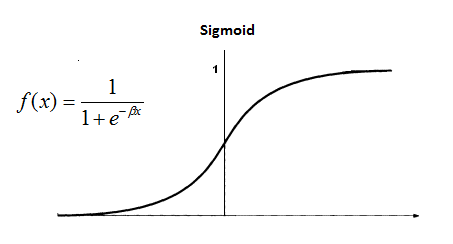
Any data fed into the sigmoid function is used to calculate a probability variable, which is used to decide whether the classification of the data is 1 or 0. Each data type will has a weight associated with it, giving the value associated with it more or less clout depending on how important it is to identifying which type of class the data belongs to.

After this is all calculated, the resulting probability value is examined to determine the class. If the probability is above 50% for example, there's a good chance that the value we're looking for is a 1--which in our case, would mean a malicious website. If below or equal to 50%, however, the odds are low that the data is a 1 value, so a 0--which signals a benign website for us--is returned instead.

Before we begin using logistic regression, however, let's take a quick look at how many malicious and benign websites we have:

In [33]:
# A function meant to calculate how many 1- and 0-values
# a dataset has:
def calc_types(dframe):
    # The possible website types are grouped together:
    test_type = dframe.groupby("Type").groups

    # The amount of malicious and benign websites
    # in the set is calculated:
    ben_num = len(test_type[0])
    mal_num = len(test_type[1])
    
    # The total number of websites is added up:
    tot_num = mal_num + ben_num
    
    # The percentage of malicious websites is calculated:
    mal_perc = mal_num / tot_num * 100

    # The results for each value are then'
    # printed off:
    print("Number of malicious sites:", mal_num)
    print("Number of non-malicious sites:", ben_num)
    print("Total number of sites:", tot_num)
    print("Malicious Site Percentage:", mal_perc)

In [34]:
calc_types(full_data)

Number of malicious sites: 216
Number of non-malicious sites: 1565
Total number of sites: 1781
Malicious Site Percentage: 12.128017967434026


There are 1781 sites, of which only 216, or roughly 12%, are malicious. These values indicate that we need to be careful while fitting and validating the data, as while 216 websites is nothing to sneeze at, we could easily cut large swathes of malicious website data out of our dataset if we're not carefull.

We will now split the data up into training and testing data. In our case, roughly 70% of the data will be training data, which will be used to "train" our binary classifier and calculate the weights for each item.

with 70% or more of the data becoming training data, and the rest being test data. Since there are 1781 total websites observed in the dataset, we'll slice the data so that 1247 values are in the training data, while the remaining 534 are in the testing data.

In [35]:
# Next comes splitting the dataset...
# (Could slice it.)

# The data is shuffled to gain more accurate results,
# since the original set is ordered by URL length:
for i in range(5):
    full_data = shuffle(full_data)

# In some circumstances, we would need to augment the data--
# adding specially-generated observations to give ourselves
# a more balanced dataset.
#
# Since our dataset is so big, however, we don't need to do
# this unless none of the values seem to impact whether
# or not the site is malicious:
training_data = full_data[:1247]
testing_data = full_data[1247:]

# The range of both datasets is reset so it's easier to read:
training_data.index = range(0, len(training_data))
testing_data.index = range(0, len(testing_data))

# Checking our work:
testing_data.head(10)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_REGDATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,DNS_QUERY_TIMES,Type
0,63,11,1,8,30,28,19,10,3181,25,25,16286,3605,6.0,0
1,43,12,1,8,30,10,8,0,803,12,12,2190,1097,4.0,0
2,72,11,1,201,42,8,0,0,0,0,0,0,0,0.0,0
3,32,7,4,125,30,16,7,0,734,11,12,7145,1060,4.0,0
4,88,15,4,8,30,20,11,3,1346,15,16,1725,1670,4.0,0
5,49,10,4,31,42,1,26,0,2270,30,24,10000,2562,4.0,0
6,46,10,1,201,42,14,21,0,4103,25,30,16662,4405,4.0,0
7,39,9,4,146,42,15,0,0,0,0,0,0,0,0.0,0
8,84,12,1,29,42,15,0,0,0,0,0,0,0,0.0,0
9,45,9,6,151,42,13,15,0,2730,19,23,9605,3046,4.0,0


Next, we'll split the data from the training dataset a little further.

In this case, we'll store the dependent variable of the dataset, the type, as a y-value, while storing every other variable as an X-value:

In [36]:
# Need to make x & y data.
# (Should probably remove some of the more dependent columns
# and add those back in later.)
# I'll probably need some sort of function for the dependencies.

# Slicing off X's type variable
X = training_data.loc[:, training_data.columns != "Type"]

# y-variable is the Type variable:
y = training_data.loc[:, training_data.columns == "Type"]

#y.head(10)

With the X and y-values successfully seperated into pieces, we can use the sm.Logit() function to plot the aforementioned logistic regression function:

In [37]:
logit_model = sm.Logit(y,X.astype(float))
result = logit_model.fit()
print(result.summary2())

         Current function value: 0.241808
         Iterations: 35
                                   Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.348     
Dependent Variable:        Type                   AIC:                    631.0697  
Date:                      2019-07-19 22:25       BIC:                    702.8686  
No. Observations:          1247                   Log-Likelihood:         -301.53   
Df Model:                  13                     LL-Null:                -462.24   
Df Residuals:              1233                   LLR p-value:            7.8896e-61
Converged:                 0.0000                 Scale:                  1.0000    
No. Iterations:            35.0000                                                  
------------------------------------------------------------------------------------
                           Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
----------------------------------

C:\Users\alexw\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Notice the P > |z| column located on the results?

*That* column contains what are called p-values, which test the odds of whether the data for a particular value actually *is* a result of some connection to a website's class value, or whether it's just pure coincidence. The higher the pvalue, the more likely the results are due to this coincidence. Get a pvalue lower than 0.05, however, and there's a less than 5% chance that the data values are a coincidence.

While the pvalues tend to change their size depending on how the data is shuffled, five variables in particular stand out between shuffles: TCP_CONVERSATION_EXCHANGE, APP_BYTES, SOURCE_APP_PACKETS, REMOTE_APP_BYTES, and DNS_QUERY_TIMES.

If they keep yielding extraordinarily high pvalues, it's a good sign we may want to remove them from the binary classifier as we improve it. Before we do that, though, we should make sure the results we got from the dataset were valid in the first place.

First, we'll retrieve the weights of the values, shown in the dataset as the coefficients for each variable.

In [45]:
# The weights to be used for predicting
# the type of each website.
fitted_weights = result.params

Then comes fitting the weights associated with each parameter:

In [39]:
# Theta transpose t x.
# Computes the sum of the weighted values used
# for each observation in the dataset.
def theta_t_x(x, theta):
    
    # Extracting the number of observations...
    (num_obs, num_vars) = x.shape
    
    # Contains the results of x and theta being multiplied:
    results_list = []
    
    # Cycling through the rows in the X table:
    for r in range(num_obs):
        this_obs = x.loc[r]

        # The values in the observation
        # are weighted.
        weighted_obs = this_obs * theta
        
        # Contains the sum of each weighted piece
        # of the observation.
        weighted_sum = weighted_obs.sum()
        
        # Adds the resulting sum to the list:
        results_list.append(weighted_sum)
        
    # Converts the list to Series format:
    results_series = pd.Series(results_list)
    
    return results_series
 
# A commented-out test to make sure theta_t_x() worked properly:
#testing_theta_x = theta_t_x(test_X, fitted_weights)
#testing_theta_x

Next, we'll calculate the values associated with the actual sigmoid function:

In [40]:
# Converts the Series of theta_t_x values
# into sigmoid form--sigmoid(z) = 1 / (1 + e^(-z))
def sigmoid(weighted_x):
    # A list built to store the resulting sigmoid values:
    sig_list = []
    
    # For each weighted value sume, do the following:
    for wx in weighted_x:
        
        # Multiply the sum by -1:
        neg_wx = wx * -1
    
        # Use it as an exponent, specifically
        # e ^ neg_wx.
        e_exp = math.exp(neg_wx)
    
        # Take the value of 1 over
        # e_exp + 1:
        sig_wx = 1 / (1 + e_exp)
        
        # Append the fully-calculated value
        # to the sigmoid list:
        sig_list.append(sig_wx)
        
    # Convert the list to a Series:
    sig_series = pd.Series(sig_list)
    
    # Send it off:
    return sig_series

# Commented-out quality control test:
#sigmoid(testing_theta_x)

Next, we can finally prepare the predictors that will be used to determine whether a website is malicious or benign:

In [41]:
# Meant to convert the floats assciated with probability
# and the sigmoid() function results to int values 
# (for classifying).
def pred_to_num(x):
    # If less than or equal to 0.5, the result is 0.
    if x <= 0.5:
        return 0
    # Otherwise, the result is 1.
    else:
        return 1

In [42]:
# Used to classify a website as either 1 (malicious)
# or 0 (benign).
def predict_y(x, theta):
    
    # The weighted x values are calculated:
    weighted_x = theta_t_x(x, theta)
    
    # The sigmoid values of those functions are calculated:
    sig_x = sigmoid(weighted_x)
    
    # Their predicted y-values are 
    predicted_y = pd.Series(map(pred_to_num, sig_x))
    
    return predicted_y

Just to make sure that our website is on the right track, we'll also add something extra: an accuracy-calculating function.

Not every binary classifier will be 100% correct, but the higher we can make the classifier's accuracy, the better. Beware a full 100% accuracy rating, though. This is generally a sign that something went wrong with how you calculated accuracy for the dataset.

In [43]:
# Checks the accuracy of predicted values
# against the actual values recorded.
def check_acc(pred, act):
    # The number of actual values
    # that got predicted correctly:
    act_count = 0
    
    #for x in pred.index:
    #    print(x)

    # Cycles through each value in the index
    for p in pred.index:
        # Record the predicted and actual values
        # for the specific website:
        prediction = int(pred.loc[p])
        actual = int(act.loc[p])
    
        #print(p)
        #print(prediction, actual)
    
        # Check to see if the two are equal:
        if prediction == actual:
            # Update the accuracy counter if they are:
            act_count = act_count + 1
        
    # Once done, calculate the percentage of
    # classes you got right:
    perc_acc = act_count / len(pred) * 100

    # Send out this accuracy value:
    return perc_acc
    
# Checking with the training predictions:
#check_acc(training_predictions, y)

In [46]:
# Just a test to see if the predicted_y is working:
predicted_training_y = predict_y(X, fitted_weights)

# Making sure check_acc works too:
check_acc(predicted_training_y, y)

90.93825180433039

Now we'll test the fitted logistic regression function on our testing data. Our reason for doing this is to make sure the data hasn't overfit--ie, picked up on patterns in the training dataset that are actually caused by random noise.

The testing dataset is meant to simulate a dataset our newly-fitted classifier function model has never seen before, in order to test how it handles to interacting with new data. If you have a high accuracy value for your training data, but a low accuracy value for your testing data, it's a telltale sign of overfitting--and a signal that you need to improve your model, generally by removing some of the X-variables and their associated weights, before refitting.

In [48]:
# The testing data is split into X and y values:
test_X = testing_data.loc[:, testing_data.columns != "Type"]
test_y = testing_data.loc[:, testing_data.columns == "Type"]

In [49]:
# Now we can get to the real work of the fitting--
# testing how accurate the work is on testing data:
predicted_testing_y = predict_y(test_X, fitted_weights)

# Checking the accuracy of the fitted values:
check_acc(predicted_testing_y, test_y)

90.2621722846442

Good news! The testing data displays a high accuracy, meaning the dataset hasn't been overfit! Let's take a quick look at what the resulting Logistic Regression curve looks like compared to one of the graph's more prominent values:

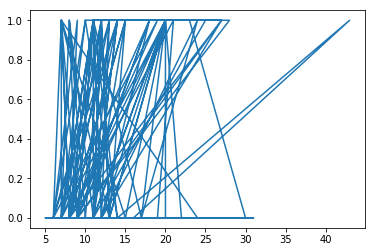

In [58]:
# The weighted x values are calculated:
test_weighted_x = theta_t_x(test_X, fitted_weights)
    
# The sigmoid values are then calculated to be used
# as y-values:
sig_x = sigmoid(test_weighted_x)

# URL Length vs testing type
plt.plot(test_X["NUMBER_SPECIAL_CHARACTERS"], predicted_testing_y)

plt.show()

plt.close(1)

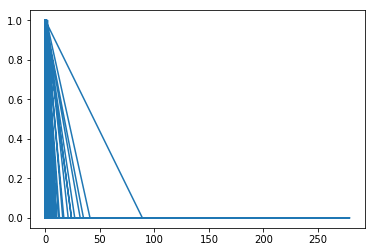

In [65]:
# The weighted x values are calculated:
test_weighted_x = theta_t_x(test_X, fitted_weights)
    
# The sigmoid values are then calculated to be used
# as y-values:
sig_x = sigmoid(test_weighted_x)

# TCP number vs testing type
plt.plot(test_X["DIST_REMOTE_TCP_PORT"], predicted_testing_y)

plt.show()

plt.close(1)

Looks like the values for the number of special characters and number of TCP ports tend to go all over the place, particularly the former.

They both seem to follow clear trends, though, with many special characters tending to indicate a malicious website, and high numbers of non-TCP ports tending to indicate the opposite.

A larger dataset with more malicious websites would likely make the graphs clearer, but even if we use the actual probabilities associated with each website, instead of their class it's unlikely that we'll get perfect logreg graphs.

## Analysis, Hypothesis Testing, and Machine Learning

Our journey isn't over yet, though, as our next sept is to validate the data. Normal datasets often have the training data split into both training and validation data, and will use this validation data to make sure that the weights of the model are well-calibrated:

In [59]:
# Do I need to reduce the training data along with the test data?
# (MAYBE a good idea; depends on how we'll be using it.)

# Data is shuffled, to make sure the validation sequence is
# more accurate:
training_data = shuffle(training_data)

# Training data is split in half:
training_data_2 = training_data[:624]
validation_data = training_data[624:]

# Data Indices are recalibrated:
training_data_2.index = range(0, len(training_data_2))
validation_data.index = range(0, len(validation_data))

# The training data is split into X and y data:
training2_X = training_data_2.loc[:, training_data_2.columns != "Type"]
training2_y = training_data_2.loc[:, training_data_2.columns == "Type"]

# The validation data is split into X and y data:
valid_X = validation_data.loc[:, validation_data.columns != "Type"]
valid_y = validation_data.loc[:, validation_data.columns == "Type"]

#predicted_valid_y1 = predict_y(valid_X, fitted_weights)

#check_acc(predicted_valid_y1, valid_y)

Before validating, we'll delete the variables mentioned that tend to have high p-values. There's a good chance their absence won't really change the accuracy of the model--and could potentially make the set easier to calculate, now that the extra weight is missing.

In [60]:
# NOTE: Adding the .copy() allows us to manipulate fitted_weights2
# without affecting fitted_weights.
fitted_weights2 = fitted_weights.copy()

# High p-value values are deleted:
del fitted_weights2["WHOIS_REGDATE"]
del fitted_weights2["TCP_CONVERSATION_EXCHANGE"]
del fitted_weights2["APP_BYTES"]
del fitted_weights2["SOURCE_APP_PACKETS"]
del fitted_weights2["REMOTE_APP_PACKETS"]
del fitted_weights2["REMOTE_APP_BYTES"]
del fitted_weights2["DNS_QUERY_TIMES"]

#predicted_valid_y2 = predict_y(valid_X, fitted_weights2)

#check_acc(predicted_valid_y2, valid_y)

# Our new weight values:
fitted_weights2

URL_LENGTH                  -0.029667
NUMBER_SPECIAL_CHARACTERS    0.251605
CHARSET                     -0.224709
SERVER                      -0.004769
WHOIS_COUNTRY               -0.079215
DIST_REMOTE_TCP_PORT        -0.653020
SOURCE_APP_BYTES            -0.000068
dtype: float64

Here's how traditional data often does the validating, with the training and validation data split 50/50:

In [61]:
#fitted_weights2

predicted_training2_y = predict_y(training2_X, fitted_weights2)

training2_acc = check_acc(predicted_training2_y, training2_y)

print("Training Accuracy:", training2_acc)

# Validation values:
predicted_valid_y2 = predict_y(valid_X, fitted_weights2)

valid_acc2 = check_acc(predicted_valid_y2, valid_y)

print("Validation Accuracy:", valid_acc2)

# Testing values:
predicted_testing_y2 = predict_y(test_X, fitted_weights2)

testing_acc2 = check_acc(predicted_testing_y2, test_y)

print("Testing Accuracy: ", check_acc(predicted_testing_y2, test_y))

Training Accuracy: 89.90384615384616
Validation Accuracy: 90.85072231139647
Testing Accuracy:  89.32584269662921


While the results may seem accurate under the current circumstances, however, the ~10% malicious data composition makes this unreliable.

In order to properly fit and validate the new dataset, we'll need to use cross-fold validation to check for accuracy.

Cross-fold validation is a special validation method--instead of having one static validation dataset like we previously tried, it splits the data up into multiple chunks called "folds". It then takes turns using each fold as a validation dataset, while fitting the data using the chunks that didn't get chosen as the validation set. After testing each and every fitted model on its respective dataset, it proceeds to choose the set with more accuracy.

The more folds used in the cross-fold validation method, the less likely the validation data will get skewed by values being in the wrong place at the wrong time.

For this specific project, we'll be using 10-fold cross validation--which splits the data up into 10 chunks for validation.

In [62]:
# Removing the unneccessary values we deleted from 
# fitted_weights2 out of the X-DataFrame:
def remove_weights(origX, approved_weights):
    newX = origX.copy()
    
    for c in newX.columns:
        if c not in approved_weights:
            del newX[c]
            
    return newX

In [63]:
# A version of X without the unnecessary values we found via regression:
X2 = remove_weights(X, fitted_weights2)

#  y will count as a DataFrame otherwise:
y2 = y["Type"]

# Fitting the data via Logistic regression cross-validation:
clf = LogisticRegressionCV(cv=10, multi_class='ovr').fit(X2, y2)

clf

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [64]:
# A version of X (for testing data) without the
# unneccessary values we found via regression
test_X2 = remove_weights(test_X, fitted_weights2)

# Storing y as a Series:
test_y2 = test_y["Type"]

# Predicting the values for the testing data:
predicted_test_y2 = pd.Series(clf.predict(test_X2))

#for p in predicted_test_y2:
#    print(p)

# Checking our accuracy:
testing_acc2 = check_acc(predicted_test_y2, test_y)

testing_acc2

89.32584269662921

Once again, let's see how the results of this cross-validated model act compared to two of the more prominent values:

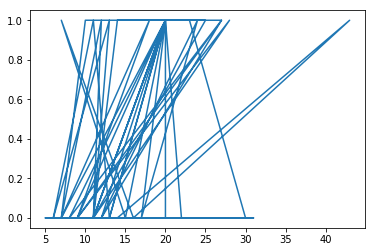

In [66]:
# URL Length vs testing type:
plt.plot(test_X["NUMBER_SPECIAL_CHARACTERS"], predicted_test_y2)

plt.show()

plt.close(1)

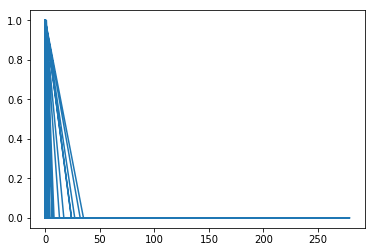

In [67]:
# TCP Number vs testing type:
plt.plot(test_X["DIST_REMOTE_TCP_PORT"], predicted_test_y2)

plt.show()

plt.close(1)

For some odd reason, both graphs seem a little more sparse. The results could easily be caused by the Cross-Validation model finding slightly less accurate fit for our model, seeing as Cross-Validation doesn't use all of the training data to fit a value.

Part of it could have been luck of the shuffle, though--and only time and experiments will tell which one can produce the better Logistic Regression function to use for classification.

## Analysis and Conclusion

The most important things to keep in mind when trying to identify any unknown website are how many special characters are contained in the URL, and how many ports are connected to your computer. Knowing what character set the website uses, or how long the URL is could also help you, though not to as big of a degree.

As far as projects go, this one was both fun and frustrating, as I got to learn how to deal with poorly-written datasets, how to perform logistic regression, and how to cross-validate.

More importantly, I learned that you always need to be on your guard for errors when making a dataset. Check your work at every step, and be aware of any values appearing where they shouldn't be, like random letters in a column with dates, or a 100% accuracy rating being constantly shunted out by your own accuracy calculator.

If I had to the project again, however, I would do it with more and better data. The biggest problem with the project, aside from the messy data, would have to be dearth of malicious website data. For a moment, I thought I would not find any trends, due to how little of it was actually in the set. Having more malicous data would make the binary classifier overall, and could turn up interesting trends in the data that I didn't notice before.

I would also test more variables, and in different ways, like seeing if the percentage of packets sent from your server to the remote website server contained any special information, or finding a better way to measure the qualitative values. While one could plausibly say that the year a website was registered has no bearing on its maliciousness or lack thereof, the lack of connection between the types of countries, or the connection associated with the character sets, could easily be due to happenstance, given their code numbers.

Given the chance, I would gladly take on a similar project for this in the future. But for now, I hope you enjoyed my little tutorial, and I hope you have a pleasant day.